# Resposta Total
Resposta total de um sistema em vibração forçada amortecida com 1GL.

A resposta total é:
$$x(t) = x_h(t) + x_p(t),$$
com
$$x_h(t) = X_0 e^{-ζ \omega_n t} \cos(\omega_n t - \phi_0)$$
e
$$x_p(t) = X \cos(ω t - \phi).$$

Temos que
$$ X = \frac{\delta_\textrm{st}}{\sqrt{(1-r^2)^2 + (2\zeta r)^2}},
\quad \tan \phi = \frac{2\zeta r }{1-r^2}.$$

Com a introdução das condições de contorno $x_0$ e $\dot x_0$, temos as belezuras abaixo.

$$X_0 =\left[ (x_0 - X \cos\phi)^2 + \frac{1}{\omega_d^2}(\zeta\omega_n x_0 + \dot x_0  - \zeta\omega_n X \cos\phi -\omega X \sin\phi)^2\right]^\frac{1}{2}, $$
e
$$ \tan \phi_0 = \frac{\zeta\omega_n x_0 + \dot x_0 - \zeta\omega_n X \cos\phi - \omega X \sin\phi}{\omega_d(x_0 - X\cos\phi)}.$$

Vamos definir o sistema mecânico e o carregamento abaixo, e ver o que acontece. Aqui poderemos ver várias coisas: os regimes permanente e transiente, o batimento, a ressonância e outros.

### Seção de setup



In [1]:
# Setup
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

## Cálculo de amplitudes e fases

In [2]:
# Vamos torcer para que estas fórmulas estejam transcritas corretamente...

def steady_state(dst, r, zeta):
  """
  Computes amplitude and fase of steady state response;
  """
  X = dst/np.sqrt((1-r**2)**2 + (2*zeta*r)**2)
  phi = np.arctan2(2*zeta*r, 1-r**2)
  return X, phi

def transient_state(x0, v0, zeta, wn, wd, w, X, phi):
  """
  Calcula a "amplitude" e "fase" do regime transiente.
  """
  X02 = (x0 - X*np.cos(phi))**2 + \
        ((zeta*wn*x0 + v0 \
                   - zeta*wn*X*np.cos(phi) \
                   - w*X*np.sin(phi))**2/wd**2)
  X0 = np.sqrt(X02)
  dy = zeta*wn*x0 + v0 - zeta*wn*X*np.cos(phi) - w*X*np.sin(phi)
  dx = wd*(x0 - X*np.cos(phi))
  phi0 = np.arctan2(dy, dx)
  return X0, phi0

## Plotagem interativa

In [3]:
def make_plot(m, c, k, F0, w, x0, v0, nt, nc, pc):
  """
  Interactive plotting function.
  """
  wn = np.sqrt(k/m)
  cc = 2*m*wn
  zeta = c/cc
  wd = np.sqrt(1-zeta**2)*wn
  r = w/wn
  dst = F0/k
  X, phi = steady_state(dst, r, zeta)
  X0, phi0 = transient_state(x0, v0, zeta, wn, wd, w, X, phi)
  w_min = min(wn, wd)
  tau = 2*np.pi/w_min    # período de interesse para plotagem
  times = np.linspace(0, nt*tau, nt*nc, endpoint=True)
  xh = X0*np.exp(-zeta*wn*times)*np.cos(wn*times - phi0)
  xp = X*np.cos(w*times - phi)
  sol = xh+xp
  if pc == 'xh':
    sol = xh
  elif pc == 'xp':
    sol = xp
  fig, ax = plt.subplots()
  fig.set_size_inches(14, 8)
  ax.plot(times, sol)
  ax.set_xlim(left=0)
  ax.set_title(f"Resposta: {pc}", fontsize=22)
  ax.set_xlabel(r"$x (m)$", fontsize=18)
  ax.set_ylabel(r"$t (s)$", fontsize=18)
  ax.grid()
  fig.show()

## Interface Gráfica

/tmp/ipykernel_892848/1220936173.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


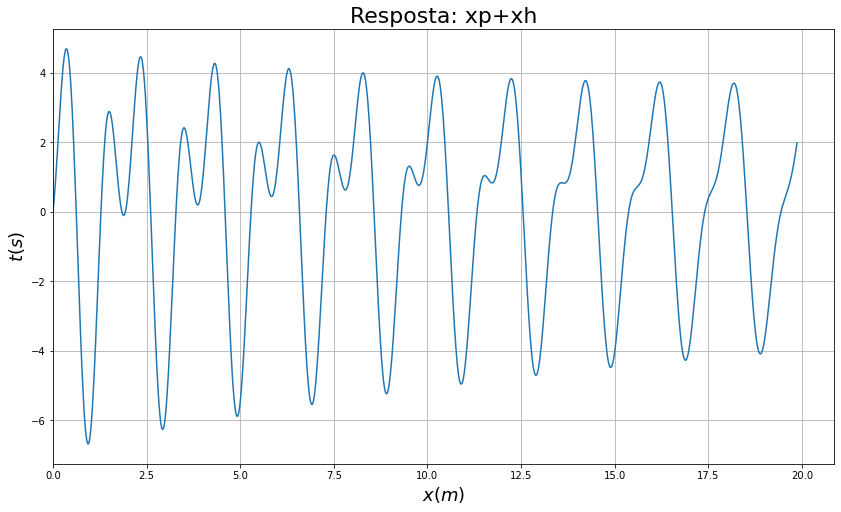

In [4]:
#@title Interface
mec_sys = [ widgets.BoundedFloatText(value=1, min=0, description="massa",
                           style={'description_width': 'initial'}),
            widgets.BoundedFloatText(value=0.12, min=0, description="amortecimento",
                           style={'description_width': 'initial'}),
            widgets.BoundedFloatText(value=40, min=0, description="rigidez",
                           style={'description_width': 'initial'})]

force = [widgets.BoundedFloatText(value=200, min=0, description="Magnitude",
                           style={'description_width': 'initial'}),
         widgets.BoundedFloatText(value=3.14, min=0, description="Frequência",
                           style={'description_width': 'initial'})]
ic = [widgets.BoundedFloatText(value=0, min=0, description="Deslocamento",
                           style={'description_width': 'initial'}),
      widgets.BoundedFloatText(value=10, min=0, description="Velocidade",
                           style={'description_width': 'initial'})]
plot_choice = widgets.ToggleButtons(
    options=['xp', 'xh', 'xp+xh'],
    value = 'xp+xh',
    description='Solução:',
    disabled=False,
    default=2,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Plotar apenas a solução particular',
              'Plotar a solução da equação harmônica', 'Plotar a solução total'],
)
 
options = [widgets.BoundedIntText(value=20, min=0, description="Número de ciclos",
                           style={'description_width': 'initial'}),
           widgets.BoundedIntText(value=50, min=0, description="Pontos por Ciclo",
                           style={'description_width': 'initial'}),
           plot_choice]

accordion = widgets.Accordion(children=[widgets.HBox(mec_sys),
                                        widgets.HBox(force),
                                        widgets.HBox(ic),
                                        widgets.HBox(options)])
accordion.set_title(0, 'Sistema Mecânico')
accordion.set_title(1, 'Força externa')
accordion.set_title(2, 'Condições Iniciais')
accordion.set_title(3, 'Opções')

accordion

graph = widgets.interactive_output(make_plot, {'m': mec_sys[0],
                                               'c': mec_sys[1],
                                               'k': mec_sys[2],
                                               'F0': force[0],
                                               'w': force[1],
                                               'x0': ic[0],
                                               'v0': ic[1],
                                               'nt': options[0],
                                               'nc': options[1],
                                               'pc': options[2]})
display(widgets.VBox([accordion, graph]))